<a href="https://colab.research.google.com/github/Likith2006/Likith2006/blob/main/assignment09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

KMeans Clustering using Evaluation matrix.           

inertia:index

In [8]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import fetch_lfw_people
import matplotlib.pyplot as plt

In [ ]:
data = fetch_lfw_people()
X = data.data

In [ ]:
n_clusters = 15


In [ ]:
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

In [ ]:
kmeans.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
inertia = kmeans.inertia_
print("Inertia:", inertia)

Inertia: 660538.8125


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

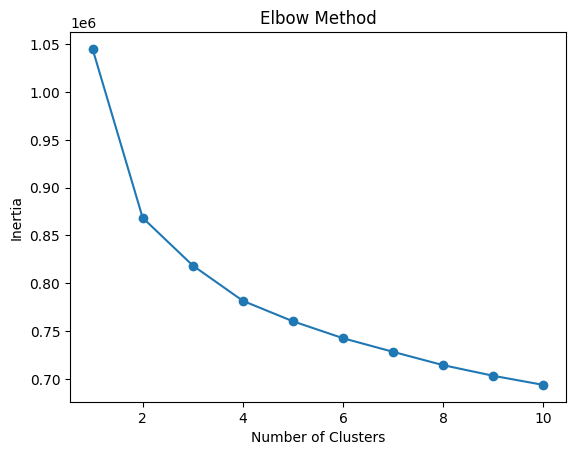

In [7]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
for num_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=num_clusters, random_state=0)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
plt.plot(range(1, 11), inertia, marker="o")
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()

Dunn Index:

In [9]:
from sklearn.metrics import pairwise_distances
import itertools
from sklearn.datasets import fetch_lfw_people

In [10]:
cluster_centers = kmeans.cluster_centers_
inter_cluster_distances = pairwise_distances(cluster_centers, metric='euclidean')

In [ ]:
import numpy as np
from sklearn.cluster import KMeans
import pandas as pd
from scipy.spatial.distance import pdist, squareform
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_lfw_people
# Define the range of cluster numbers you want to evaluate
cluster_range = range(2, 11)  # Adjust as needed

# Store Dunn Index values for different cluster numbers
dunn_indices = []

# Calculate the Dunn Index for different cluster numbers
for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X)
    cluster_centers = kmeans.cluster_centers_
    labels = kmeans.labels_

    # Calculate pairwise Euclidean distances between data points
    pairwise_distances = squareform(pdist(X))

    # Calculate the minimum inter-cluster distance
    min_inter_cluster_distance = np.min([np.min(pairwise_distances[labels == i][:, labels != i]) for i in range(n_clusters)])

    # Calculate the maximum intra-cluster distance
    max_intra_cluster_distance = np.max([np.max(pairwise_distances[labels == i][:, labels == i]) for i in range(n_clusters)])

    # Calculate the Dunn Index
    dunn_index = min_inter_cluster_distance / max_intra_cluster_distance
    dunn_indices.append(dunn_index)

# Plot the Dunn Index values for different cluster numbers
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, dunn_indices, marker='o', linestyle='-')
plt.title("Dunn Index vs. Number of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Dunn Index")
plt.grid(True)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


PCA (Principal Component Analysis).

In [ ]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_lfw_people
import matplotlib.pyplot as plt

In [ ]:
data = fetch_lfw_people()
X = data.data
y = data.target

In [ ]:
mean = np.mean(X, axis=0)
std = np.std(X, axis=0)
X_standardized = (X - mean) / std

In [ ]:
n_components = 2
pca = PCA(n_components=n_components)

In [ ]:
X_reduced = pca.fit_transform(X_standardized)

In [ ]:
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratios:", explained_variance_ratio)

Explained Variance Ratios: [0.30139276 0.09871211]


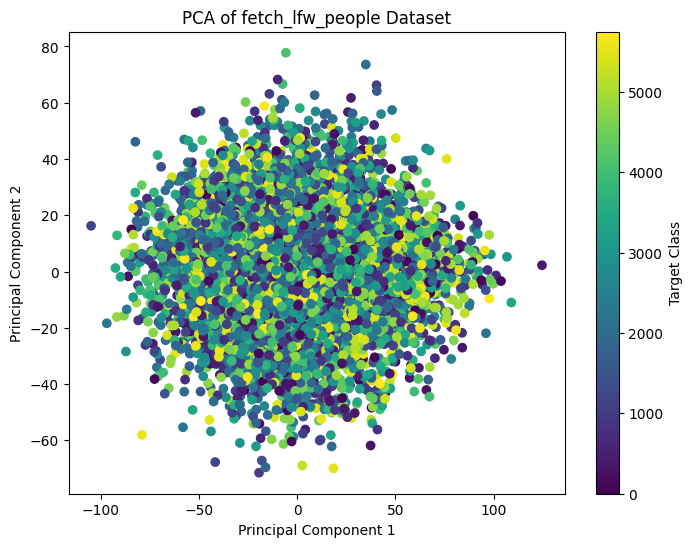

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of fetch_lfw_people Dataset')
plt.colorbar(label='Target Class')
plt.show()